# 0. Import libraries

In [3]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Data wrangling

In [7]:
df = pd.read_excel
df = np.loadtxt('HM01X_Data_023885_999999999794987_edited.csv', delimiter=',', skiprows=1, usecols=1)

## 1.1. Gap filling

text

 ### 1.1.1. Linear interpolation

In [ ]:
df.interpolate('linear')

### 1.1.2. Polynomial and piecewise polynomial interpolation

In [ ]:
df.interpolate('polynomial')

### 1.1.3. Spline and cubic spline interpolation

In [ ]:
df.interpolate('spline')

### 1.1.4. Quadratic interpolation

In [ ]:
df.interpolate('quadratic)

## 1.2. Resampling

text

### 1.2.1. Upsampling

In [ ]:
df.resample

### 1.2.2. Downsampling

In [ ]:
df.resample

## 1.3. Detrending

text

### 1.3.1. Time domain methods

text

#### 1.3.1.1 Moving average filtering

In [ ]:
df.rolling.mean()

### 1.3.2. Frequency domain methods

text

#### 1.3.2.1. Low pass filtering

In [ ]:
np.sosfilt

#### 1.3.2.2. High pass filtering

In [ ]:
np.sosfilt

#### 1.3.2.3. Band pass filtering

In [ ]:
np.sosfilt

# 2. Interpreting responses to time-lagged signals

text

## 2.1. Import dataset

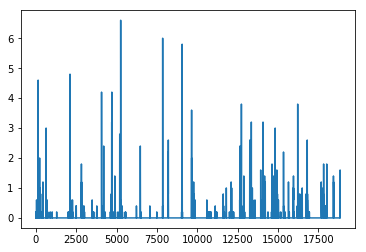

In [23]:
# Precipitation dataset
f = np.loadtxt('HM01X_Data_023885_999999999794987_edited.csv', delimiter=',', skiprows=1, usecols=1)
f[f>10.] = 0.

# Atmospheric tritium dataset
#f = np.loadtxt('Tadros.csv', delimiter=',', skiprows=1, usecols=1)

plt.plot(f)

## 2.2. Kernel types

impulse response, lagged impulse response, advanced impulse response, exponential decrease, logarithmic increase

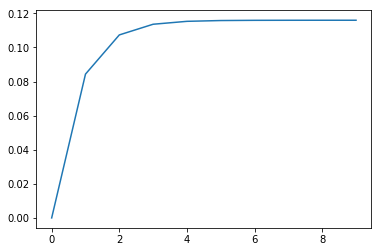

In [25]:
nlags = 10
t = np.arange(nlags)
g = np.zeros(nlags)

# Impulse response
#g[0] = 1.

# Lagged impulse response
#g[5] = 1.

# Advanced impulse response
#g[9] = 1.

# Exponential decrease
#g = np.exp(-t*1.3)/np.sum(np.exp(-t*1.3))

# Logarithmic increase
g = np.exp(-t*1.3)/np.sum(np.exp(-t*1.3))
g = g[0]-g
g = g/np.sum(g)

plt.plot(g)

## 2.3. Convolution (in the forwards direction)

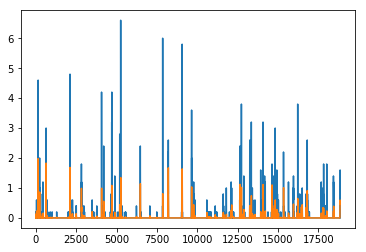

In [26]:
h = np.convolve(f, g, 'same')
plt.plot(f); plt.plot(h)

## 2.4. Deconvolution (in the backwards direction)

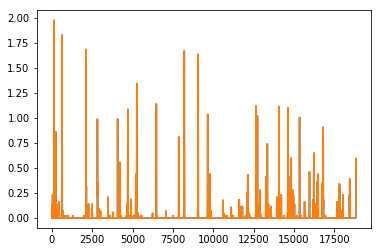

In [27]:
def func(g):
    global f,h
    return np.sum((np.convolve(f, g, 'same')-h)**2.)

obs = h

from scipy.optimize import least_squares
g = least_squares(func, np.zeros(nlags)).x
h = np.convolve(f, g, 'same')

plt.plot(obs); plt.plot(h)

# 3. Identifying responses to periodic signals

text

## 3.1. Import dataset

In [ ]:
np.loadtxt

## 3.2. Discrete Fourier Transfrom

In [ ]:
np.fft

## 3.3. Periodograms

text

### 3.3.1. Bartlett

In [ ]:
sc.signal.periodogram

### 3.3.2. Welch

In [ ]:
sc.signal.Welch

### 3.3.4. Lomb-Scargle

In [ ]:
sc.signal.lombscargle

### 3.3.5. Harmonic least squares

In [ ]:
import hydrogeosines as hgs
hgs.hals

### 3.3.6. Cross-spectral density

In [ ]:
sc.signal.csd

### 3.3.7. Coherence

In [ ]:
sc.signal.coherence